##  K Nearest Neighbour

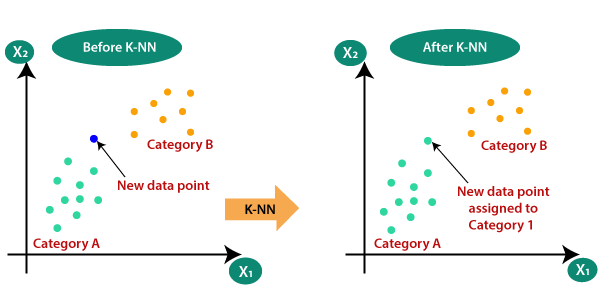

Credit: [javatpoint](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

**Model explanation:** </br>
This categorizes data points based on how close they are to the points. But to categorize them, this depends on the value of k. K is equal to the number of points that we use in determinin the category of a data point. For example in the above image, if k = 1, we use the most nearest neighbor to then conclude that the new point belongs in category A.

In [1]:
# imports
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
title = "train_sample.csv"
df_train = pd.read_csv(title)
df_train

,Y,text
0,1,podcaster makes solemn promise to improve soun...
1,1,tsa agent can bring himself to make dad take o...
2,1,law schools now require applicants to honestly...
3,1,r stine reveals slappy from night of the livin...
4,0,psychic helps sniff out missing pet skunk
...,...,...
995,1,bank of america introduces new 50 underdraft fee
996,1,man just going to assume this counts as minced
997,1,report more americans willing to accept female...
998,1,lemur fantasizes about ripping face off next d...


1) Tokenization

chunk words in sentences into seperate entities.

2) Stemming

Stemming - get root word (running -> run)

Lemmentizing - root work from various forms of word (ran -> run , running -> run)

Removing stop words

In [3]:
import os
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


ps = PorterStemmer()

In [4]:
# finds important words in dataset tweets and stores them into array
# drops stop words

corpus = []
import re

#goes up to length of dataset
for i in range(len(df_train["text"])):
    train_text = re.sub('[^a-zA-Z]',' ',df_train["text"][i])
    train_text = train_text.lower()
    train_text = train_text.split()
    clean_review = [ps.stem(word) for word in train_text if not word in set(stopwords.words('english'))]
    clean_review = ' '.join(clean_review)
    corpus.append(clean_review)
    
# view cleaned text first 
corpus[0]

'podcast make solemn promis improv sound qualiti next episod'

3) Text Feature Extraction

This step includes converting the comments themselves to numerical data. I used TF-IDF (Term Frequency-Inverse Document Frequency), which gives a value to each word in a text from 0 to 1 to determine its importance. Other feature extraction methods can be used [here](https://medium.com/@eskandar.sahel/exploring-feature-extraction-techniques-for-natural-language-processing-46052ee6514)

Why I used TF-IDF: it determines importance of word in my collection of texts based on its frequency in both the singular text and collection of texts. This also accounts for all words by assigning them a value ranging from 0 - 1 instead of prioritizing top x words.</br>

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


In [5]:
# #method 2 - from eskandar.sahel

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vec = TfidfVectorizer() #control hyperparameter tunings
X_tfidf = tfidf_vec.fit_transform(corpus)
print('TF-IDF:')
print(tfidf_vec.get_feature_names_out()[:10])
print(X_tfidf.toarray()[0][:10])

X = tfidf_vec.fit_transform(corpus).toarray()

TF-IDF:
['ab' 'abandon' 'abba' 'abomin' 'abort' 'abram' 'absenc' 'absolut' 'abu'
 'academ']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
y = df_train.iloc[ : , 0].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

## KNN Model (test run)

In [7]:
# Splitting train : test to 80 : 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### 1) Optimal K value
</br>

code referenced: [Moussa Doumbia - Elbow Method in Supervised Machine Learning(Optimal K Value)](https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7)
</br>

Line plot train vs test credit: [Saurav Agrawal - Hyperparameter Tuning of KNN Classifier](https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7)


In [8]:
error_rate = []
# Will take some time
for i in range(1,80):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

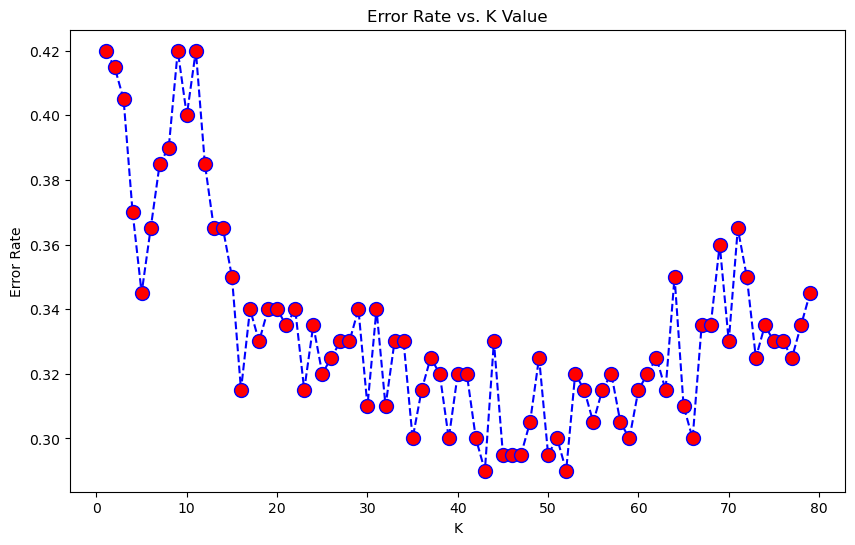

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

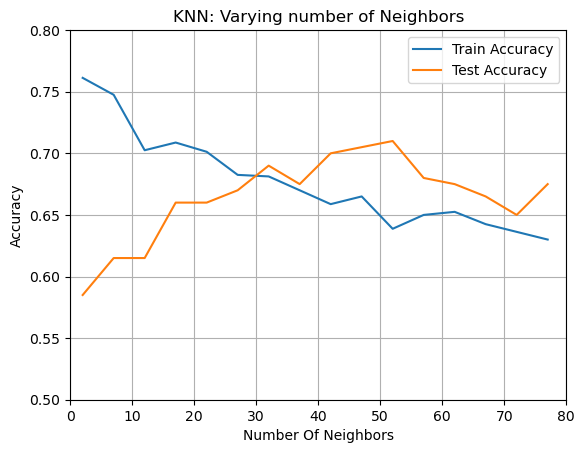

In [16]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 80)
plt.ylim(0.50, 0.80)
plt.grid()
plt.show()

## b) Running Model

Code referenced: [Ashinsk - Text-Classification Github](https://github.com/Ashinsk/Text-Classification/blob/master/src/KNN.py)

In [11]:
model = KNeighborsClassifier(n_neighbors=43)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=43)

In [12]:
y_pred = model.predict(X_test)
print('Predicted',y_pred)
print('Actual data',y_test)


Predicted [0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0]
Actual data [0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1]


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

Accuracy 0.71


## Evaluation of Model
</br>

In [14]:
from sklearn.metrics import classification_report
print('Classification report')
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       102
           1       0.81      0.53      0.64        98

    accuracy                           0.71       200
   macro avg       0.74      0.71      0.70       200
weighted avg       0.74      0.71      0.70       200



In [15]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 80, 5)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)